<a href="https://www.kaggle.com/code/thaonguyen1412/eda-and-machine-learning-for-the-titanic?scriptVersionId=150574499" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# Load and Check Data

In [2]:
titanic = pd.read_csv("/kaggle/input/titanic/train.csv")

test_data = pd.read_csv("/kaggle/input/titanic/test.csv")


titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Generate a summary statistics

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# First look at the variables

## Distribution of Survival rate

In [5]:
#Frequency table of Survival rate

survival_rate = titanic['Survived'].value_counts()

survival_rate

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
# Percentage of Survival rate

survival_pect = survival_rate/ survival_rate.sum() * 100
survival_pect

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

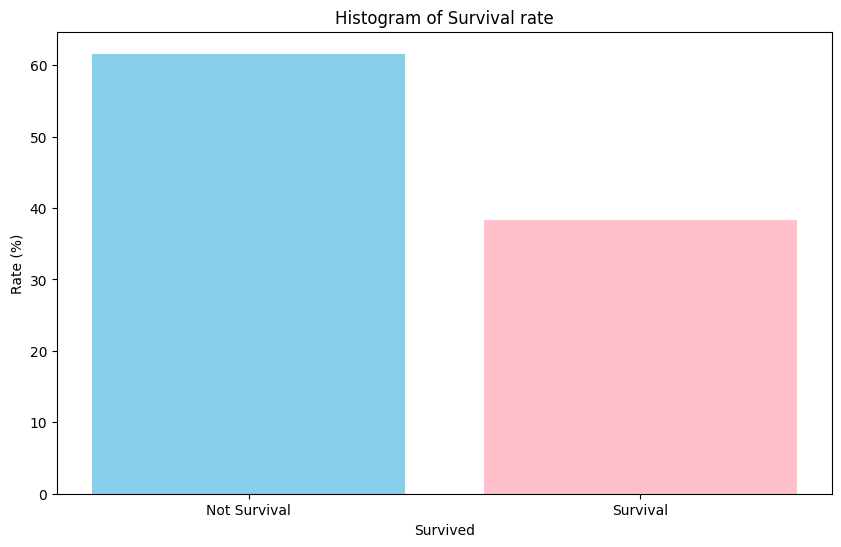

In [7]:
# Visualization of Survival rate

plt.figure(figsize=(10, 6)) 

lables = ['Not Survival', 'Survival']

plt.bar(lables, survival_pect, color = ["skyblue", "pink"])

plt.xlabel("Survived")
plt.ylabel("Rate (%)")
plt.title("Histogram of Survival rate")

plt.savefig("survival rate.jpg", format="jpeg")

plt.show()

## Distribution of "Pclass", "Sex", "Cabin", "Embarked"

### Write a function to draw categorical bar charts

In [8]:
def titanic_bars(variable):
    """
    "variable" is the column's name 
    
    Return:
        "The frequency table and bar chart of the desired variable. "
    """
    # Count the frequency of variable
    
    sub_freq = titanic[variable].value_counts()
    
    sub_pect = sub_freq / sub_freq.sum()*100
        
    # Plot the bar chart 
    
    plt.figure(figsize=(10, 6)) 

    plot_bar = plt.bar(sub_pect.index, sub_pect, color = ["pink"])

    plt.xlabel(variable)
    plt.ylabel("Percentage (%)")
    plt.title( f"Bar chart of {variable}")
    
    plt.savefig(f"{variable}.jpg", format="jpeg")
    
    plt.show()
    
    print (sub_freq )

### Apply the funtion 

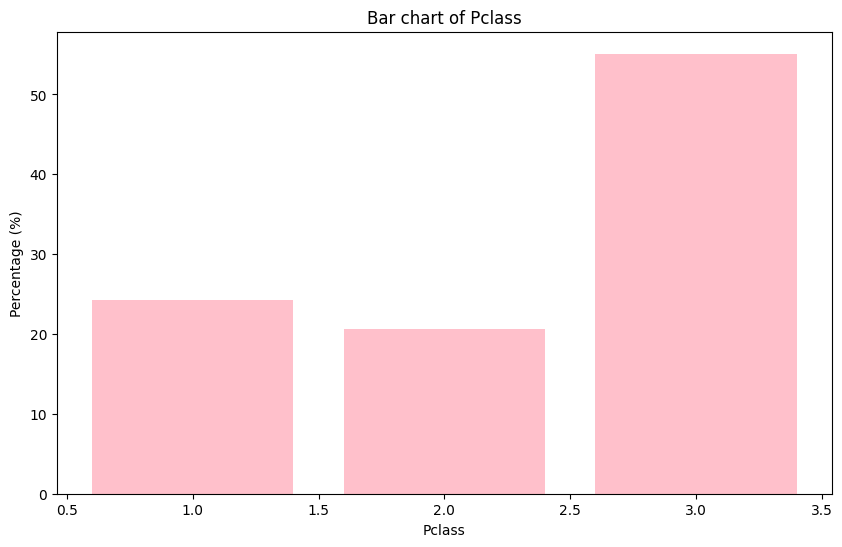

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


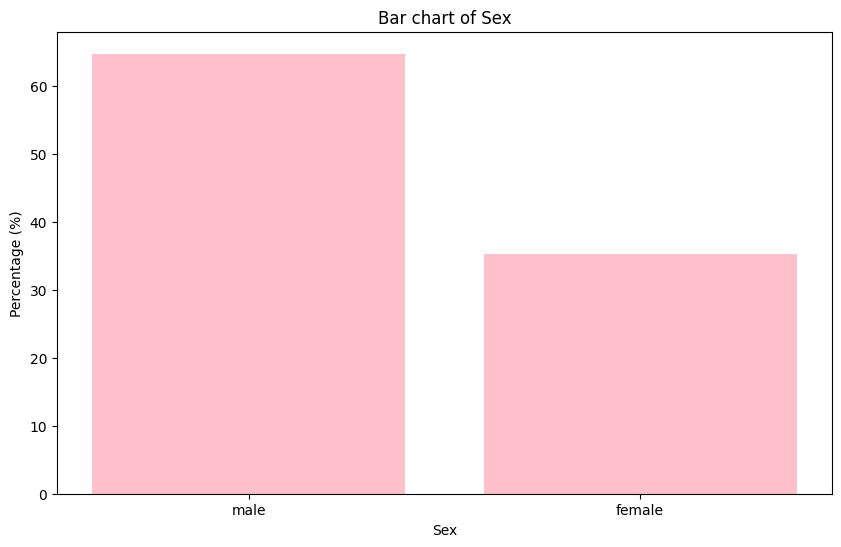

Sex
male      577
female    314
Name: count, dtype: int64


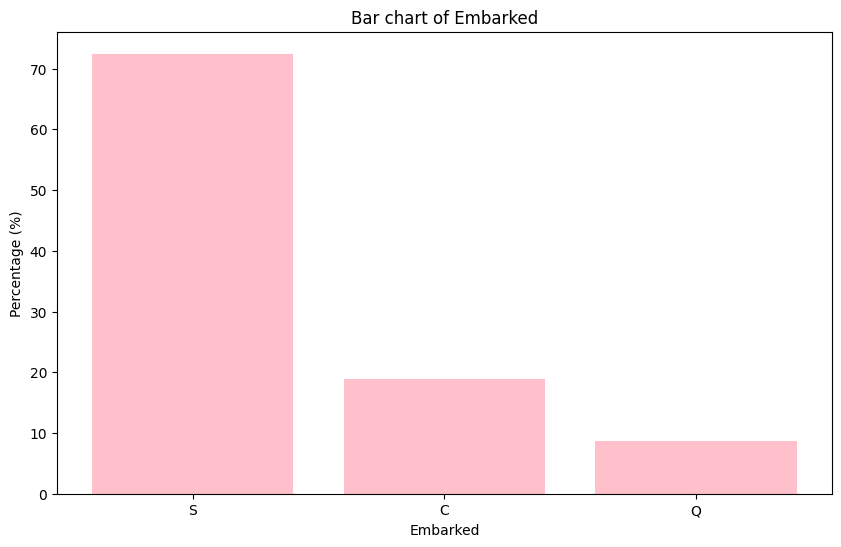

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


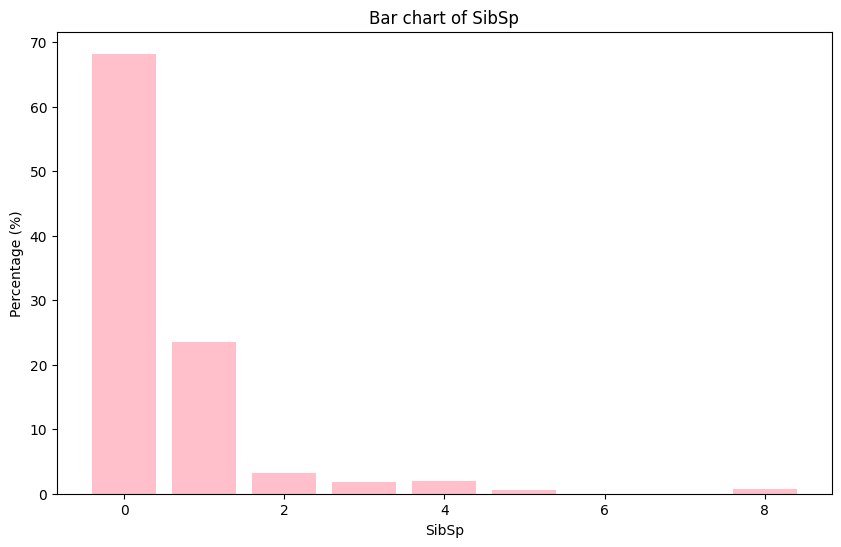

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


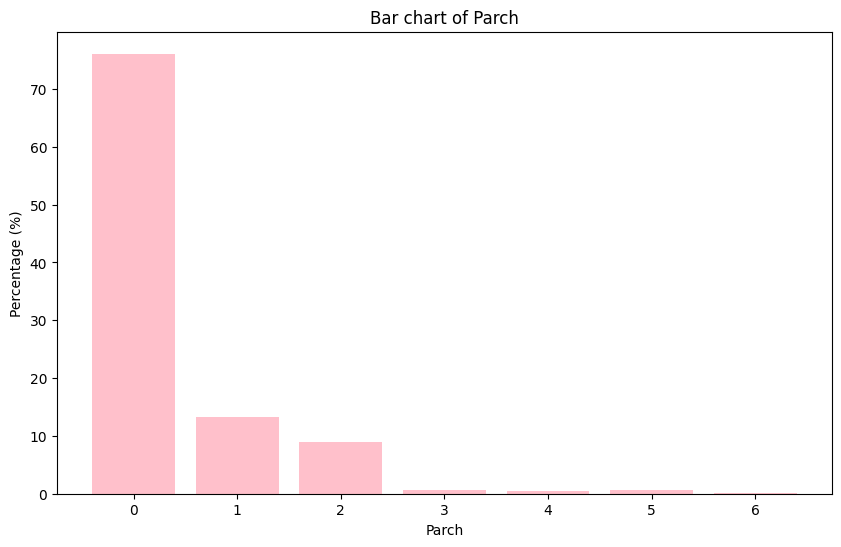

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [9]:
column_name = ["Pclass", "Sex", "Embarked", "SibSp", "Parch"]

for i in column_name:
    titanic_bars(i)

## Distribution of Age 

In [10]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
titanic['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

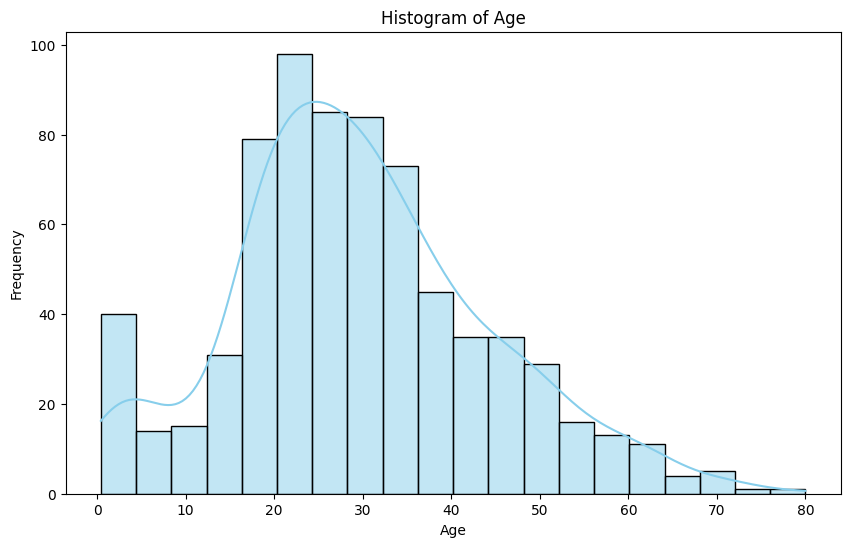

In [12]:
plt.figure(figsize=(10, 6))  

sns.histplot(data = titanic, x='Age', kde=True, color='skyblue', bins=20)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")

plt.savefig("Age.jpg", format="jpeg")

plt.show()

Most Titanic passengers were in the 20 to 35 age range, with a peak around 25. There were also notable numbers of passengers both younger than 18 and older than 60, indicaBng a diverse age demographic.

## Determine if the survival rate is associated to the class of passenger

### Two-way table

In [13]:
pclass_survived = titanic.groupby('Pclass')["Survived"].value_counts()

pclass_survived

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

### Percentage of survival rate based on the level of Pclass.

In [14]:
percentage_pclass_survived = pd.DataFrame(titanic.groupby('Pclass')["Survived"].value_counts(normalize=True) * 100)

percentage_pclass_survived.reset_index(inplace = True)

percentage_pclass_survived

,Pclass,Survived,proportion
0,1,1,62.962963
1,1,0,37.037037
2,2,0,52.717391
3,2,1,47.282609
4,3,0,75.763747
5,3,1,24.236253


### Visualization survival percentage based on Pclass

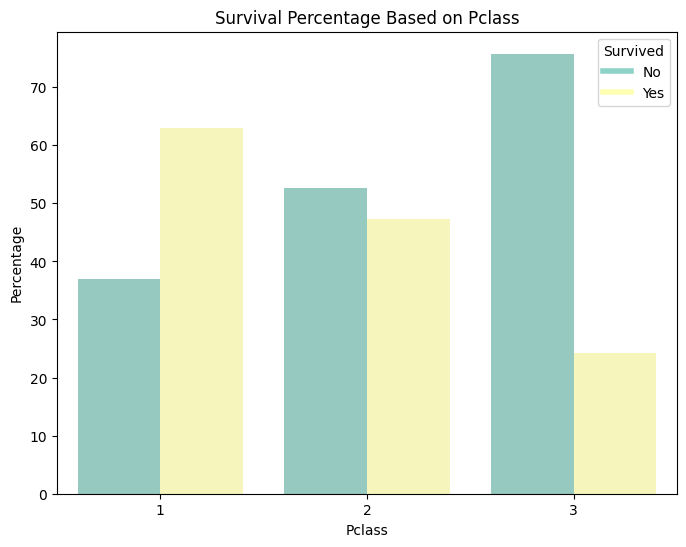

In [15]:
plt.figure(figsize=(8, 6))

sns.barplot(data=percentage_pclass_survived, x= "Pclass", y="proportion", hue="Survived", palette="Set3")

plt.xlabel("Pclass")
plt.ylabel("Percentage")
plt.title("Survival Percentage Based on Pclass")

legend_labels = ["No", "Yes"]
legend_handles = [plt.Line2D([0], [0], color=sns.color_palette("Set3")[i], lw=4) for i in range(2)]
plt.legend(legend_handles, legend_labels, title="Survived")

plt.savefig("Based on Pclass.jpg", format="jpeg")

plt.show()

The insight from this data is that there was a clear correlaBon between the passenger's room class and their survival rate on the Titanic. Passengers in higher-class accommodaBons had a beGer chance of survival.

## Determine if the survival rate is associated to the gender

### Two-way table

In [16]:
gender_survived = titanic.groupby('Sex')["Survived"].value_counts()

gender_survived

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

### Percentage of survival rate based on gender

In [17]:
percentage_gender_survived = pd.DataFrame(titanic.groupby('Sex')["Survived"].value_counts(normalize=True) * 100)
percentage_gender_survived.reset_index(inplace=True)
percentage_gender_survived

,Sex,Survived,proportion
0,female,1,74.203822
1,female,0,25.796178
2,male,0,81.109185
3,male,1,18.890815


### Visualization survival percentage based on gender

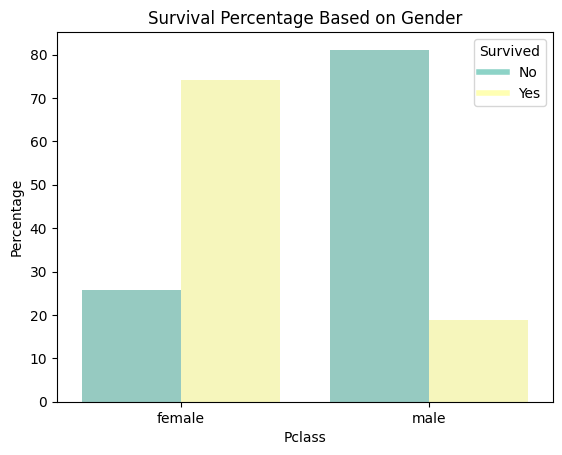

In [18]:
sns.barplot(data=percentage_gender_survived, x="Sex", y="proportion", hue="Survived", palette="Set3")

plt.xlabel("Pclass")
plt.ylabel("Percentage")
plt.title("Survival Percentage Based on Gender")

plt.legend(title="Survived", labels=["No", "Yes"])

legend_handles = [plt.Line2D([0], [0], color=sns.color_palette("Set3")[i], lw=4) for i in range(2)]
plt.legend(legend_handles, legend_labels, title="Survived")

plt.savefig("Based on Gender.jpg", format="jpeg")

plt.show()

Females had a much higher survival rate than males, at 74.2% compared to 18.9%.

## Determine the survival rate is associated to the age

### Distribution of Age with the survived status

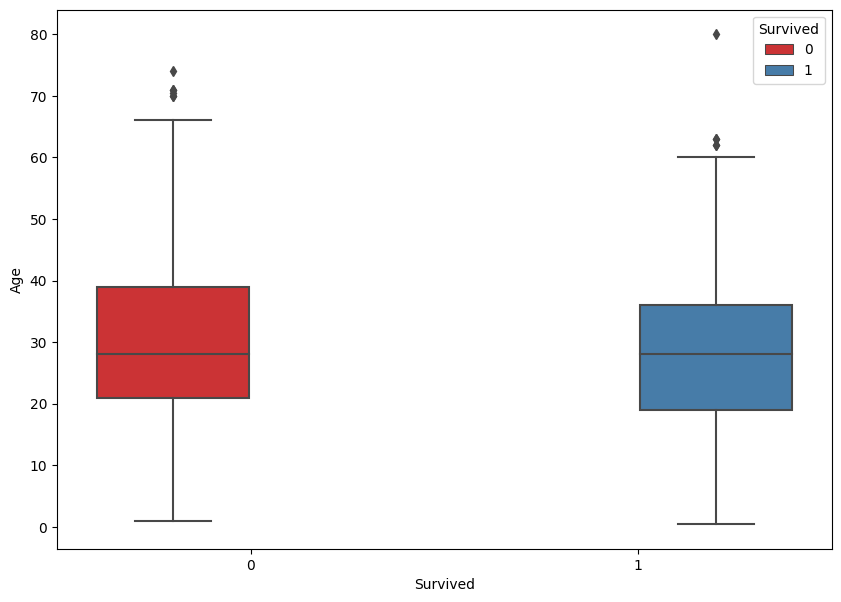

In [19]:
plt.figure(figsize=(10,7))

sns.boxplot(x='Survived',y='Age',data=titanic, hue="Survived", palette="Set1")

plt.savefig("Based on Age.jpg", format="jpeg")

plt.show()

### Two-way table

In [20]:
titanic["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
# Define age group bins and labels
age_bins = [0, 17, 30, 60, 100]
age_labels = ["0-17", "18-29", "30-59", "60+"]

# Create a new column "AgeGroup" with the age group labels
titanic["AgeGroup"] = pd.cut(titanic["Age"], bins=age_bins, labels=age_labels)

# Create a two-way table of age group vs. survival
age_group_survival = pd.crosstab(titanic["AgeGroup"], titanic["Survived"])

# Calculate the survival rate as a percentage
age_group_survival["No (%)"] = (age_group_survival[0] / age_group_survival[[0, 1]].sum(axis=1) * 100).round(2)
age_group_survival["Yes (%)"] = (age_group_survival[1] / age_group_survival[[0, 1]].sum(axis=1) * 100).round(2)

age_group_survival.reset_index(inplace = True)

age_group_survival

Survived,AgeGroup,0,1,No (%),Yes (%)
0,0-17,52,61,46.02,53.98
1,18-29,191,105,64.53,35.47
2,30-59,164,119,57.95,42.05
3,60+,17,5,77.27,22.73


In [22]:
# Transpose data to draw side-by-side bar chart

age_group_survival_melted = age_group_survival.melt(id_vars=["AgeGroup"], var_name="Survived", value_name="Survival Rate (%)", value_vars = ["No (%)", "Yes (%)"])

age_group_survival_melted

,AgeGroup,Survived,Survival Rate (%)
0,0-17,No (%),46.02
1,18-29,No (%),64.53
2,30-59,No (%),57.95
3,60+,No (%),77.27
4,0-17,Yes (%),53.98
5,18-29,Yes (%),35.47
6,30-59,Yes (%),42.05
7,60+,Yes (%),22.73


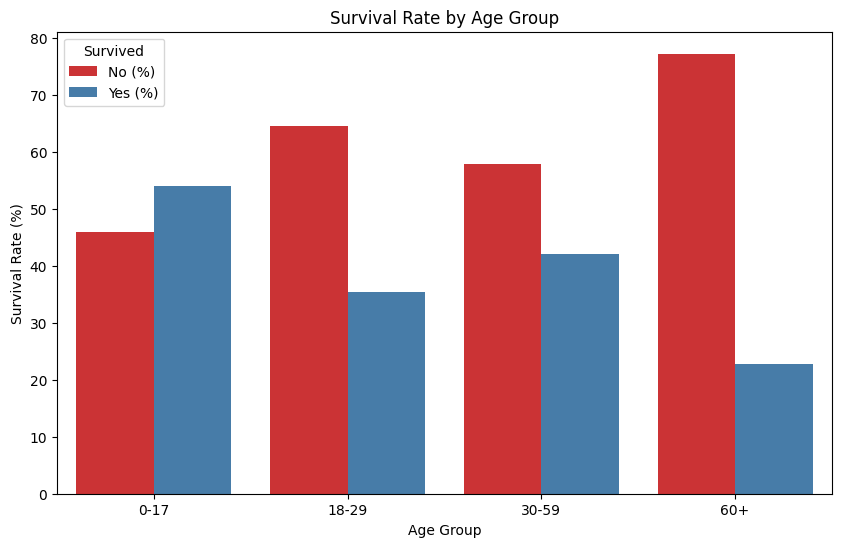

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_survival_melted, x="AgeGroup", y="Survival Rate (%)", hue="Survived", palette = "Set1")

plt.xlabel("Age Group")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Age Group")

plt.legend(title="Survived")
plt.savefig("Based on Age2.jpg", format="jpeg")

plt.show()

The bar chart visually underscores that younger passenger had a notably higher chance of surviving the Titanic disaster compared to their older counterparts.

# Chi-Square Test between 'Survived' and 'Pclass'.

- Null Hypothesis (H0): The two categorical variables are independent.
- Alternative Hypothesis (H1): The two categorical variables are not independent; there is an association between them.

In [24]:
from scipy.stats import chi2_contingency

survived_pclass = pd.crosstab(titanic["Survived"], titanic["Pclass"])

chi2, p, _, _ = chi2_contingency(survived_pclass)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")

Chi-Square Value: 102.88898875696056
P-value: 4.549251711298793e-23


he p-value is approximately 4.55×10−234.55×10−23, an extremely small value, much less than a commonly used significance level like 0.05.

Therefore, we have strong evidence to reject the null hypothesis. The two variables are not independent; there is a significant relationship between them.

# Check for the correlation and visualize using seaborn sns heatmap  

In [25]:
numeric_columns = titanic.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

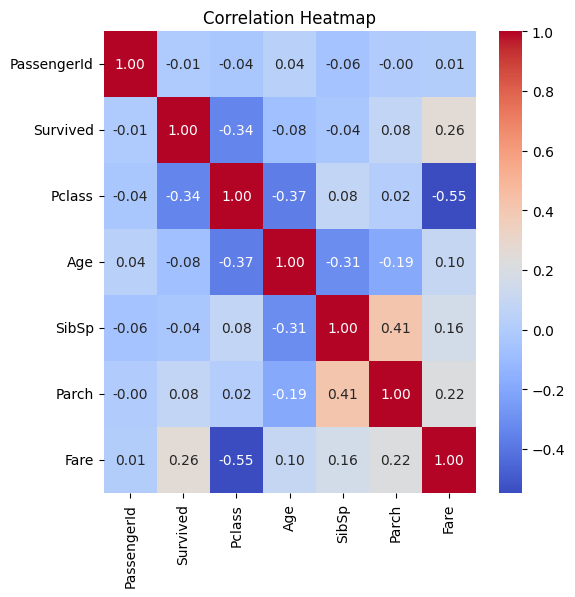

In [26]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Data Processing 

- Handle missing values
- Drop irrelevant data
- Encode categorical variables.
- Handle numerical features (scaling, normalization if necessary).

### Handle missing values and outliers

In [27]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
dtype: int64

In [28]:
# Drop the 'Cabin' column
titanic = titanic.drop(columns='Cabin')

In [29]:
# Fill in missing data in "Age" column by  using the average (mean) age

titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

### Drop unecessary columns

In [30]:
titanic = titanic.drop(columns =['PassengerId','Name', 'Ticket', 'AgeGroup'])

### Encode categorical variables

In [31]:
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'])

OR This is another way to encode categorical variables but doesn't affect the original data

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ["Age", "Fare"]),
        ('cat', OneHotEncoder(), ["Sex", "Embarked"])
    ])

# Data Splitting

In [32]:
from sklearn.model_selection import train_test_split

X = titanic.drop(columns = ['Survived'])
y = titanic['Survived']


In [33]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling & Evaluation

1. Model Selection

We have several models for you to choose:
- Logistic regression
- Decision trees
- Random forests
- Support vector machines, etc.

2. Model Training

3. Model Evaluation:

  Evaluate your model's performance on the testing set using accuracy as the metric. We can consider metrics like precision, recall, F1-score, and ROC-AUC if needed.

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    bool   
 7   Sex_male    891 non-null    bool   
 8   Embarked_C  891 non-null    bool   
 9   Embarked_Q  891 non-null    bool   
 10  Embarked_S  891 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 46.2 KB


### Model training

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a RandomForestClassifier 
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

### Testing model

In [36]:
predictions = model.predict(X_test)

### Evaluating model

In [37]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)

accuracy

0.8044692737430168

In [38]:
# Print the classfication report

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



# Test data cleaning

In [39]:
# Drop the 'Cabin' column - Null value
test_data = test_data.drop(columns='Cabin')

# Fill in missing data in "Age" column by  using the average (mean) age

test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)


# Drop unecessary columns

test_data1 = test_data.drop(columns =['PassengerId','Name', 'Ticket'])

# Encode categorical variables

test_data1 = pd.get_dummies(test_data1, columns=['Sex', 'Embarked'])

# Make predictions for the actual Test data

In [40]:
Predict_survived = model.predict(test_data1)

In [41]:
test_data["Survived"] = Predict_survived

In [42]:
survived_submission = test_data[["PassengerId", "Survived"]]

In [43]:
survived_submission.to_csv("survived_submission.csv", index = False)

# 